# What does "hypothesis testing" mean?

Hypothesis testing is an important part of science. There are many texts about it, about p-values, about null hypotheses, and so on, which try to explain what these concepts are and avoid their misuse. Some texts are meant to be read by mathematicians, others by healthcare researchers, others by social science researchers, and they are all correct in their own way.

In this text, I assume you are acquainted with:

* Statistics in Python (`scipy.stats`)
* Conditional probabilities
* The Central Limit Theorem

I addressed the following questions:

* What is hypothesis testing?
* How to setup a quick hypothesis test
* What is a null hypothesis and why is it needed?
* What is an alternative hypothesis
* What are one-tailed and two-tailed tests
* What is a p-value
* What is the significance level $\alpha$
* How to interpret p-values

This is a somewhat long text. If you find something that could be clarified, please send me a message.

## TL,DR: a quick hypothesis testing framework

If you are on a rush and need to prepare a hypothesis test in the next few minutes, you could well use the following recipe:

1. Find the *status-quo* parameter $\theta_0$ (this is usually a mean $\mu_0$, but theory does allow for other parameters)
1. Estimate a new parameter $\theta_1$, which, again, is usually an estimate of the mean $\mu_1$ in your experimental group.
1. Define a Null Hypothesis $H_0: \theta_0 = \theta_1$.
1. Define an Alternative Hypothesis $H_1: \theta_0 \neq \theta_1$ 
1. Define a significance level $\alpha$, which is usually 5%.
1. Calculate the p-value, which is $P(\text{data is as extreme or more extreme as the observation} | H_0)$
1. If the p-value is lower than $\alpha$, reject $H_0$ in favor of $H_1$
1. Else, you have failed to reject $H_0$ and your data cannot challenge the status-quo.

In terms of code, this could be as simple as:

`st.ttest_1samp(experimental_sample, mu0)`

However, you might be asking yourself *why* do we perform each of these steps. This is far from trivial and there are many perspectives to this problem, and many ways to explain it. Keep on reading for one of the possible perspectives to the problem. 


## What is hypothesis testing, anyway?

Let's take for example a measurement of the weights of lettuces. According to a quick Google search, lettuces weight around 300g, but they could easily go around 250g or 350g. Because I don't know much about lettuces, I will just assume that regular lettuce weights follow a Normal distribution with $\mu=300$ and $\sigma=50$.

Now let's suppose I decided to grow some lettuces with a non-standard technique. This is a different population from the standard one because I purposefully intervented onto it. Now we have two groups: the *control* group, which used the standard technique, and the *experimental* group, which used the non-standard technique.

We usually know things about the control group because they are well-established, but we don't know much about the experimental group because its conditions are a novelty. Hence, we will need to estimate parameters for the experimental group. How do we do this?



## Collecting data

As a non-agricultural person, I have no idea how to actually grow lettuces other than planting seeds, watering them, and hoping they will grow. There is obviously more to that, but in this text we are more interested in the data that comes out of this experiment than in the details of lettuce crops. We should weight some lettuces of the experimental group, which will get us the following *measurements*:

* A sample mean $\bar{x} = \hat{\mu_e}$
* A sample standard deviation $s = \hat{\sigma_e}$
* A sample size N

We don't have direct access to these other parameters, but we suppose they exist:

* $\mu_e$, the model mean for the experimental group. We only have access to $\bar{x}$. 
* $\sigma_e$, the model standard deviation for the experiment. We only have access to $s$.

Now, we are starting to get somewhere!


## The Null Hypothesis

We have some sample measurements in the experimental group. It's likely that these sample statistics are a bit different from the model statistics from the control group. However, because the experimental group has samples, they could hypothetically have been generated under the model parameters of the control group.

That would actually be a problem, because it would mean that the experimental group and the control group follow the same statistics, and hence are not discernible. In other words, it would mean that our novel non-standard lettuce growing technique is not different from the standard one. We are especially interested in findind differences between the population means $\mu$ and $\mu_e$, because they represent the expected values for lettuce weights.

So, let's suppose $\mu=\mu_e$. In this case, $\bar{x}$ is a bit of an extreme observation, in the sense that it is a bit far from the model mean $\mu$. This leads to our *null* hypothesis:

$$
H_0: \mu = \mu_e, 
$$

that is, we will begin with the hypothesis the both model means are equal.



## Why do we need a Null Hypothesis?

The idea of a Null Hypothesis comes from a philosophical view of science that is commonly linked to Karl Popper. According to Popper, if we are to *prove* something, then we have to analyze it in all possible angles and possibilities, which is impossible. However, if we are to *disprove* something, we only need no gather any kind of evidence against it.

For this reason, hypothesis testing starts with a Null Hypothesis $H_0$ which mathematically models the idea that there is nothing relevant happening in our experiment (that is: $\mu=\mu_e$). If we are able to gather evidence against $H_0$, then we can *reject* it. Likewise, for the reasons Popper stated, we can never *accept* the null - we can only *fail to reject* it.

To gather evidence agains the Null, we use...

## The p-value

The *p-value* measures how likely is our observation data under the hypothesis that $\mu=\mu_e$. If our observations are very unlikely, we could use them as evidence against the null hypothesis. Hence, assuming the null hypothesis as true, we will calculate the probability of observing a sample at least as extreme as $\bar{x}$.

If we use the Central Limit Theorem and assume Normal distributions all around, what we would get is that, assuming the Null Hypothesis is true, the sample mean in the experimental group follows a distribution:

$$
\bar{X} \sim N(\mu, \sigma^2/N)
$$

so, for a sample of size $N=10$ lettuces, we would have:

In [1]:
import scipy.stats as st
import numpy as np
mu = 300
sigma = 50
N = 10
xbar = 350
sigma_xbar = sigma / np.sqrt(N)
p = 1-st.norm.cdf(xbar, loc=mu, scale=sigma_xbar)
print(p)

0.0007827011290012509


This means that, if the Null Hypothesis ($H_0$) is true, and if our modelling afterwards makes sense, we have a probability $P(\bar{X} \geq \bar{x} | \mu_e = \mu) = 7 \times 10^{-4}$. This is called a *p-value*.

One common practice to deal with this question is to pre-define a level $\alpha$ which is called *significance level*. If the p-value is below $\alpha$, then we call our effect *statistically significant* and we *reject* the Null Hypothesis. Why do we need this?

## The Alternative Hypothesis

When we calculated our p-value, we used the line:

`p = 1-st.norm.cdf(xbar, loc=mu, scale=sigma_xbar)`,

which calculates $P(\bar{X} \geq \bar{x} | \mu_e=\mu)$. This is because our alternative hypothesis is that $\mu_e > \mu$. This alternative hypothesis only makes sense if we *know* that $\mu_e$ cannot be lower than $\mu$ - and this entirely depends on how confident we are in our novelty lettuce growing technique.

Another possible alternative hypothesis would be $\mu_e \neq \mu$. In this case, we would have to consider extreme observations in both sides of the Normal curve, thus our p-value would be twice the one we had previously calculated. These different approaches are often called *one-sided* and *two-sided* tests.

In general, we would write the alternative hypothesis as one of the following:

$$
H_1: \mu < \mu_e \text{ (for a one-sided test)}\\
H_1: \mu > \mu_e \text{ (for a one-sided test)}\\
H_1: \mu \neq \mu_e \text{ (for a two-sided test)}\\
$$

In the code above, we could change the p-value for a *two-sided* test using:

In [2]:
import scipy.stats as st
import numpy as np
mu = 300
sigma = 50
N = 10
xbar = 350
sigma_xbar = sigma / np.sqrt(N)
p = 2*(1-st.norm.cdf(xbar, loc=mu, scale=sigma_xbar))
# If xbar < mu, we should use:
# p = 2*st.norm.cdf(xbar, loc=mu, scale=sigma_xbar)
print(p)

0.0015654022580025018


## The significance level $\alpha$

When we perform a test, there are two possibilities for the *reality*: either $H_0$ is true or it is not true. Also, there are two possibilities for our actions: we either reject $H_0$ or we don't reject them.

Now, let's assume $H_0$ is true.

In this case, the p-value is a random variable with a Uniform distribution between 0 and 1. This is because $H_0$ means we know the process that generated the observation, and p-values are estimated using the estimating CDFs for samples of that distribution. Check the code below for a more algorithmic view on this:

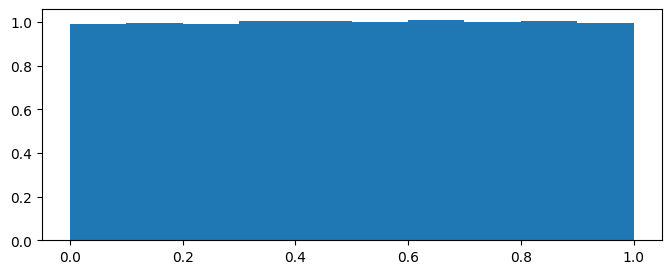

In [3]:
# The p-value is a random variable with uniform distribution
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# Distribution parameters - you might change this
mu = 10
sigma = 2

# Generate observations under H0
observations = st.norm.rvs(size=100000, loc=mu, scale=sigma)

# Calculate two-tailed p-values for the observations
p_values = 2*np.minimum(st.norm.cdf(observations, loc=mu, scale=sigma), 1-st.norm.cdf(observations, loc=mu, scale=sigma))

plt.figure(figsize=(8,3))
plt.hist(p_values, density=True)
plt.show()

Ok, so this shows that, if $H_0$ is true, the p-value has a uniform distribution between 0 and 1 (this holds for any distribution - just go ahead and test it!). Consequently, there is only a probability $\alpha$ that the p-value is lower than $\alpha$. Henceforth, if $H_0$ is true, there is a probability $\alpha$ that the we get a p-value equal or lower to $\alpha$, or $P(p < \alpha | H_0)$.

Because of its probabilistic nature, when we decide to reject the Null, there is a chance we are wrong. In this case, we had a *false positive*, also known as a *Type-1 Error*. The probability that we made a type-1 error is the significance level $\alpha$.

Importantly, this discussion only regards *false positives*, or *false rejections of $H_0$*. If $H_0$ was, in fact, false, than none of this discussion applies.

## Is a low p-value all you need?

We could want lower p-values. However, remember that p-values only refer to their corresponding null hypothesis. In our case, the p-values refer to the hypothesis that $\mu=\mu_e$.

Hence, rejecting the null hypothesis means that our observations indicate that $\mu$ is not *strictly* equal to $\mu_e$. It says absolutely nothing about how different they are. In fact, we would need an effect size analysis for this, which is a whole different problem.

An interesting experiment is the following. If you go back to the code above and insanely increase the sample size, you will observe that $p$ quickly drops. This is one of the techniques for the so-called *p-value hacking*.

Although low p-values can make your boss, your funding agency, and ultimately yourself very happy, there is more to that. Effects can be statistically significant, but their practical significance should be evaluated as well. For example, we could well observe a very low p-value with a mean difference of 1g between lettuce crops, which represents less than half of a typical lettuce leaf... perhaps it is not even worth trying it in practice!

## In conclusion

Hypothesis testing is a very important, yet very misinterpreted part of science. This text was a short review on that, and hopefully a useful one. The next step from here is to build a repertoire of tests that are useful in your field - perhaps start with the t-test?